# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='./Reacher_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Solution

/home/rofox/work/udacity/rl/venv/lib/python3.5/site-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 5	Average Score: 2.68	00:03:55
Episode 10	Average Score: 5.20	00:07:54
Episode 15	Average Score: 10.59	00:11:53
Episode 20	Average Score: 15.13	00:15:52
Episode 25	Average Score: 19.05	00:19:51
Episode 30	Average Score: 21.59	00:23:51
Episode 35	Average Score: 23.23	00:27:51
Episode 40	Average Score: 24.69	00:31:52
Episode 45	Average Score: 25.48	00:35:52
Episode 50	Average Score: 26.33	00:39:51
Episode 55	Average Score: 27.07	00:43:51
Episode 60	Average Score: 27.65	00:47:51
Episode 65	Average Score: 28.12	00:51:52
Episode 70	Average Score: 28.57	00:55:52
Episode 75	Average Score: 28.84	00:59:52
Episode 80	Average Score: 29.17	01:03:52
Episode 85	Average Score: 29.32	01:07:53
Episode 90	Average Score: 29.54	01:11:54
Episode 95	Average Score: 29.76	01:15:54
Episode 100	Average Score: 29.94	01:19:55
Episode 101	Average Score: 30.25	01:20:43
Environment solved in 1 episodes!	Average Score: 30.25


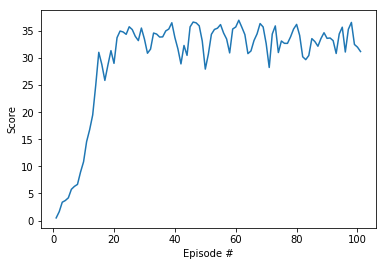

In [5]:
import random
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
import time
import torch

from ddpg.ddpg_agent import Agent

agent = Agent(num_agents=num_agents, state_size=state_size, action_size=action_size, random_seed=2)

def ddpg(n_episodes=200):
    scores_deque = deque(maxlen=100)
    scores = []
    start = time.time()
    for i_episode in range(1, n_episodes+1):
        agent.reset()
        # reset the environment
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations

        add_noise=True
        score = 0
        while True:
            if i_episode > 100:
                add_noise=False
            actions = agent.act(states, add_noise=add_noise)   # select an action (for each agent)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            for i in range(num_agents):
                agent.step(states[i], actions[i], rewards[i], next_states[i], dones[i])
            num_update = 10
            for _ in range(num_update):
                agent.update()
            states = next_states
            score += np.mean(rewards)
            #print('\r{}: {} {} {}'.format(t, score, actions[0], actions[1]), end="")
            if np.any(dones):
                break 
        scores_deque.append(score)
        scores.append(score)

        current = time.time()
        elapsed = current - start
        elapsed_str = time.strftime("%H:%M:%S", time.gmtime(elapsed))
        print('\rEpisode {}\tAverage Score: {:.2f}\t{}'.format(i_episode, np.mean(scores_deque), elapsed_str), end="")
        if i_episode%5 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}\t{}'.format(i_episode, np.mean(scores_deque), elapsed_str))
        if np.mean(scores_deque)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_deque)))
            break
    torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
    torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')

    return scores

ddpg_scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(ddpg_scores)+1), ddpg_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


When finished, you can close the environment.

### 3.1. Solution with NoisyNetwork instead of OUNoise

Episode 5	Average Score: 1.65	00:04:36
Episode 10	Average Score: 4.83	00:09:16
Episode 15	Average Score: 10.59	00:13:56
Episode 20	Average Score: 15.13	00:18:36
Episode 25	Average Score: 18.82	00:23:17
Episode 30	Average Score: 21.34	00:27:57
Episode 35	Average Score: 23.13	00:32:37
Episode 40	Average Score: 24.56	00:37:19
Episode 45	Average Score: 25.78	00:41:59
Episode 50	Average Score: 26.73	00:46:40
Episode 55	Average Score: 27.28	00:51:22
Episode 60	Average Score: 27.74	00:56:03
Episode 65	Average Score: 28.31	01:00:43
Episode 70	Average Score: 28.71	01:05:24
Episode 75	Average Score: 29.13	01:10:05
Episode 80	Average Score: 29.47	01:14:46
Episode 85	Average Score: 29.73	01:19:27
Episode 90	Average Score: 29.85	01:24:07
Episode 94	Average Score: 30.05	01:27:52
Environment solved in -6 episodes!	Average Score: 30.05


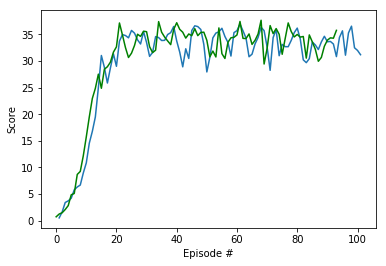

In [6]:
import random
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
import time
import torch

from ddpg.ddpg_agent import NoisyAgent

agent = NoisyAgent(num_agents=num_agents, state_size=state_size, action_size=action_size, random_seed=2)

def ddpg(n_episodes=200):
    scores_deque = deque(maxlen=100)
    scores = []
    start = time.time()
    for i_episode in range(1, n_episodes+1):
        agent.reset()
        # reset the environment
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations

        add_noise=True
        score = 0
        while True:
            actions = agent.act(states)   # select an action (for each agent)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            for i in range(num_agents):
                agent.step(states[i], actions[i], rewards[i], next_states[i], dones[i])
            num_update = 10
            for _ in range(num_update):
                agent.update()
            states = next_states
            score += np.mean(rewards)
            #print('\r{}: {} {} {}'.format(t, score, actions[0], actions[1]), end="")
            if np.any(dones):
                break 
        scores_deque.append(score)
        scores.append(score)

        current = time.time()
        elapsed = current - start
        elapsed_str = time.strftime("%H:%M:%S", time.gmtime(elapsed))
        print('\rEpisode {}\tAverage Score: {:.2f}\t{}'.format(i_episode, np.mean(scores_deque), elapsed_str), end="")
        if i_episode%5 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}\t{}'.format(i_episode, np.mean(scores_deque), elapsed_str))
        if np.mean(scores_deque)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_deque)))
            break
    torch.save(agent.actor_local.state_dict(), 'checkpoint_noisy_actor.pth')
    torch.save(agent.critic_local.state_dict(), 'checkpoint_noisy_critic.pth')

    return scores

noisy_ddpg_scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(ddpg_scores)+1), ddpg_scores)
plt.plot(np.arange(len(noisy_ddpg_scores)), noisy_ddpg_scores, color='red')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Play

In [7]:
import time
import torch
from collections import deque
from ddpg.ddpg_agent import Agent

agent = Agent(num_agents=num_agents, state_size=state_size, action_size=action_size, random_seed=2)
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

scores_deque = deque(maxlen=100)

start = time.time()

for i_episode in range(3):
    agent.reset()
    # reset the environment
    env_info = env.reset(train_mode=False)[brain_name]
    states = env_info.vector_observations

    score = 0
    while True:
        actions = agent.act(states, add_noise=False)   # select an action (for each agent)
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        for i in range(num_agents):
            agent.step(states[i], actions[i], rewards[i], next_states[i], dones[i])
        states = next_states
        score += np.mean(rewards)
        if np.any(dones):
            break 
    scores_deque.append(score)

    current = time.time()
    elapsed = current - start
    elapsed_str = time.strftime("%H:%M:%S", time.gmtime(elapsed))
    print('\rEpisode {}\tAverage Score: {:.2f}\t{}'.format(i_episode, np.mean(scores_deque), elapsed_str))

Episode 0	Average Score: 35.14	00:01:19
Episode 1	Average Score: 34.01	00:02:39
Episode 2	Average Score: 33.89	00:04:00


In [8]:
env.close()